In [1]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd



# Fraud Data

In [2]:
data=pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df=data.rename({'Undergrad':'Under','Marital.Status':'MStatus','Taxable.Income':'Tincome','City.Population':'CPopulation','Work.Experience':'Wexp'},axis=1)
df.head()

,Under,MStatus,Tincome,CPopulation,Wexp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
xy=[0,30000,100000]
categeory=['Risky','Good']
df['Tincome']=pd.cut(df['Tincome'],xy,labels=categeory)
df.head()

,Under,MStatus,Tincome,CPopulation,Wexp,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [5]:
dff=df.copy()
dff.head()

,Under,MStatus,Tincome,CPopulation,Wexp,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


dff['Tincome']=label_encoder.fit_transform(df['Tincome'])
dff['MStatus']= label_encoder.fit_transform(df['MStatus'])
dff['Urban']=label_encoder.fit_transform(df['Urban'])
dff['Under']= label_encoder.fit_transform(df['Under'])
dff.head()

,Under,MStatus,Tincome,CPopulation,Wexp,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [7]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10,shuffle =True,random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)


In [8]:
a=dff.iloc[:,[0,1,4,5]]
b=dff.iloc[:,2]

In [9]:
results=cross_val_score(model,a,b,cv=kfold)
print(results.mean())

0.6883333333333334


# for company data

<AxesSubplot:>

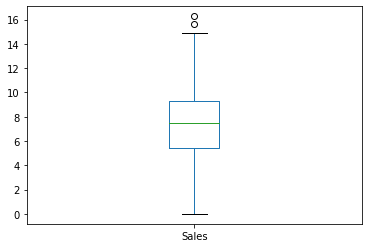

In [10]:
data = pd.read_csv('Company_Data.csv')
data['Sales'].plot(kind='box')

In [11]:
xyz=[0,5,9,15,20]
categeory=['0 to 5','5 to 9','9 to 15','15 to 20']
data['Sales']=pd.cut(data['Sales'],xyz,labels=categeory)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9 to 15,138,73,11,276,120,Bad,42,17,Yes,Yes
1,9 to 15,111,48,16,260,83,Good,65,10,Yes,Yes
2,9 to 15,113,35,10,269,80,Medium,59,12,Yes,Yes
3,5 to 9,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0 to 5,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
label_encoder = preprocessing.LabelEncoder()
data['US']=label_encoder.fit_transform(data['US'])
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data['Sales']=label_encoder.fit_transform(data['Sales'])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3,138,73,11,276,120,0,42,17,1,1
1,3,111,48,16,260,83,1,65,10,1,1
2,3,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [13]:
c=data.iloc[:,1:]
d=data.iloc[:,0]
results=cross_val_score(model,c,d,cv=kfold)
print(results.mean())

0.6725000000000001
